In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [8]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [14]:
print(dataset.shape)
print(X.shape)
print(y.shape)

(10000, 14)
(10000, 10)
(10000,)


array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [13]:
#lable_encode geographical
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
print(X[:, 1].shape)


(10000,)


In [15]:
#lable_encode Gender
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
print(X[:,2].shape)

(10000,)


In [20]:
#categorical 
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
print(X.shape)

(10000, 11)


/home/usama/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/usama/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [1.0000000e+00, 0.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [22]:
#split X Y into train test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


/home/usama/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [26]:
#feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In [100]:
from tensorflow.keras.optimizers import Adam
def churn_model():
    model=Sequential()
    model.add(Dense(60,activation='relu',input_dim=11))
    model.add(Dense(60,activation='relu'))
    model.add(Dense(60,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [110]:
model=churn_model()
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test),shuffle=True)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 189us/sample - loss: 0.4358 - acc: 0.8129 - val_loss: 0.3904 - val_acc: 0.8300
Epoch 2/10
8000/8000 [==============================] - 1s 133us/sample - loss: 0.3645 - acc: 0.8489 - val_loss: 0.3544 - val_acc: 0.8620
Epoch 3/10
8000/8000 [==============================] - 1s 133us/sample - loss: 0.3439 - acc: 0.8576 - val_loss: 0.3472 - val_acc: 0.8555
Epoch 4/10
8000/8000 [==============================] - 1s 136us/sample - loss: 0.3371 - acc: 0.8626 - val_loss: 0.3464 - val_acc: 0.8595
Epoch 5/10
8000/8000 [==============================] - 1s 136us/sample - loss: 0.3326 - acc: 0.8629 - val_loss: 0.3424 - val_acc: 0.8575
Epoch 6/10
8000/8000 [==============================] - 1s 140us/sample - loss: 0.3275 - acc: 0.8661 - val_loss: 0.3406 - val_acc: 0.8560
Epoch 7/10
8000/8000 [==============================] - 1s 135us/sample - loss: 0.3220 - acc: 0.8676 - val_loss: 0.3494 - va

In [111]:
model.evaluate(X_test,y_test)

2000/2000 [==============================] - 0s 59us/sample - loss: 0.3466 - acc: 0.8535


[0.34655758821964266, 0.8535]

In [112]:
history=model.history.history

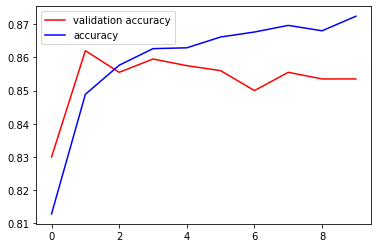

In [113]:
plt.plot(history['val_acc'],color='red',label="validation accuracy")
plt.plot(history['acc'],color='blue',label='accuracy')
plt.legend()
plt.show()

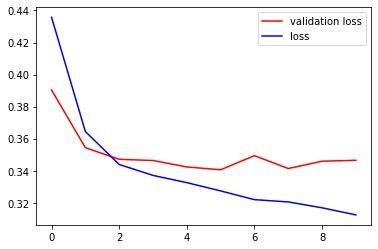

In [114]:
plt.plot(history['val_loss'],color='red',label="validation loss")
plt.plot(history['loss'],color='blue',label='loss')
plt.legend()
plt.show()

In [126]:
pred=model.predict(X_test)
pred=(pred>0.5)

In [129]:
model.save('churn_model.h5')